## import the main libraries

In [2]:
# Essential Libraries for Data Manipulation and Visualization
import pandas as pd  # Handling structured data (DataFrames & Series)
import numpy as np  # Numerical operations and computations
import matplotlib.pyplot as plt  # Plotting and visualization
import seaborn as sns  # Statistical data visualization

# Library for visualizing missing values
import missingno as msno  # Helps analyze missing data patterns

# OS library for handling file operations
import os  

# Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Preprocessing Libraries
from sklearn.model_selection import train_test_split  # Splitting data into training and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Scaling numerical features & encoding categorical data

# Handling Missing Values
from sklearn.impute import SimpleImputer  # Replaces missing values with a defined strategy (e.g., median)

# Automating Data Preprocessing
from sklearn.pipeline import Pipeline  # Streamlining transformations
from sklearn.compose import ColumnTransformer  # Applying different transformations to numerical & categorical columns

# Models
from sklearn.linear_model import LinearRegression, SGDRegressor ## SGDRegressor --> Stochastic Gradient Descent

## Load the DataBase

In [4]:
# Load the dataset from a CSV file  
df_housing = pd.read_csv('California_Housing_CitiesAdded.csv')  

# Display the first 5 rows of the dataset  
df_housing.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco,ocean_proximity,City
0,500001.0,1.2434,52,249,78,396,85,37.80,-122.27,2524.614616,552234.0515,731023.5749,61415.35211,14466.70538,NEAR BAY,Alameda
1,500001.0,1.1696,52,609,236,1349,250,37.87,-122.25,7897.024567,556856.9280,735788.3723,67242.51828,19172.81885,NEAR BAY,Alameda
2,500001.0,7.8521,52,1668,225,517,214,37.86,-122.24,9154.528309,555442.5086,734372.6023,65849.13943,19335.74118,NEAR BAY,Alameda
3,500001.0,9.3959,52,3726,474,1366,496,37.85,-122.24,8259.085109,554610.7171,733525.6829,64867.28983,18811.48745,NEAR BAY,Alameda
4,500001.0,7.8772,52,2990,379,947,361,37.83,-122.23,7284.913015,552365.4712,731263.5682,62493.11252,18750.94628,NEAR BAY,Alameda


In [5]:
# check information
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
 14  ocean_

In [6]:
# Generate summary statistics for the numerical columns in the dataset  
df_housing.describe()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,2.064000e+04,2.064000e+04,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,35.631861,-119.569704,40509.264883,2.694220e+05,3.981649e+05,349187.551219,386688.422291
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,2.135952,2.003532,49140.039160,2.477324e+05,2.894006e+05,217149.875026,250122.192316
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,32.540000,-124.350000,120.676447,4.205891e+02,4.849180e+02,569.448118,456.141313
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,33.930000,-121.800000,9079.756762,3.211125e+04,1.594264e+05,113119.928650,117395.477500
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,34.260000,-118.490000,20522.019100,1.736675e+05,2.147398e+05,459758.877000,526546.661700
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,37.710000,-118.010000,49830.414478,5.271562e+05,7.057954e+05,516946.491000,584552.007950
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,41.950000,-114.310000,333804.686400,1.018260e+06,1.196919e+06,836762.678200,903627.663300


In [7]:
# Count the number of missing values in each column of the dataset  
df_housing.isna().sum()

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
ocean_proximity             0
City                        0
dtype: int64

In [13]:
# Count the number of duplicate rows in the dataset  
df_housing.duplicated().sum()

0

* > 'Comment: It seems that the dataset contains 20,640 instances and No null values and No duplicate rows in the feature. Also, all data types are float64 as they represent continuous numerical features, except for the ocean_proximity and city column, which is a nominal categorical feature.'

### Exploratory Data Analysis(EDA)

In [17]:
# Count the occurrences of each unique value in the 'ocean_proximity' column in descending order  
ocean_values = df_housing['ocean_proximity'].value_counts(ascending=False)

# Display the unique category names in the 'ocean_proximity' column  
ocean_values

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

C:\Users\mo\AppData\Local\Temp\ipykernel_2408\448482217.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = ocean_values[i]


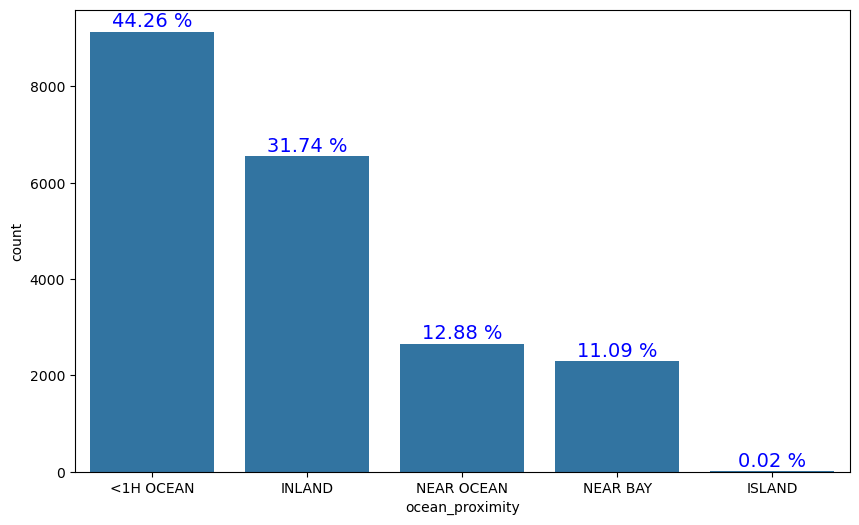

In [19]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a count plot for 'ocean_proximity', ordering by frequency
sns.countplot(x='ocean_proximity', data=df_housing, order=ocean_values.index)

# Add percentage annotations on bars
for i in range(ocean_values.shape[0]):
    count = ocean_values[i]
    text = f'{100 * count / df_housing.shape[0]:.2f} %'  # Calculate percentage
    plt.text(i, count + 100, text, ha='center', color='blue', fontsize=14)

# Show the plot
plt.show()

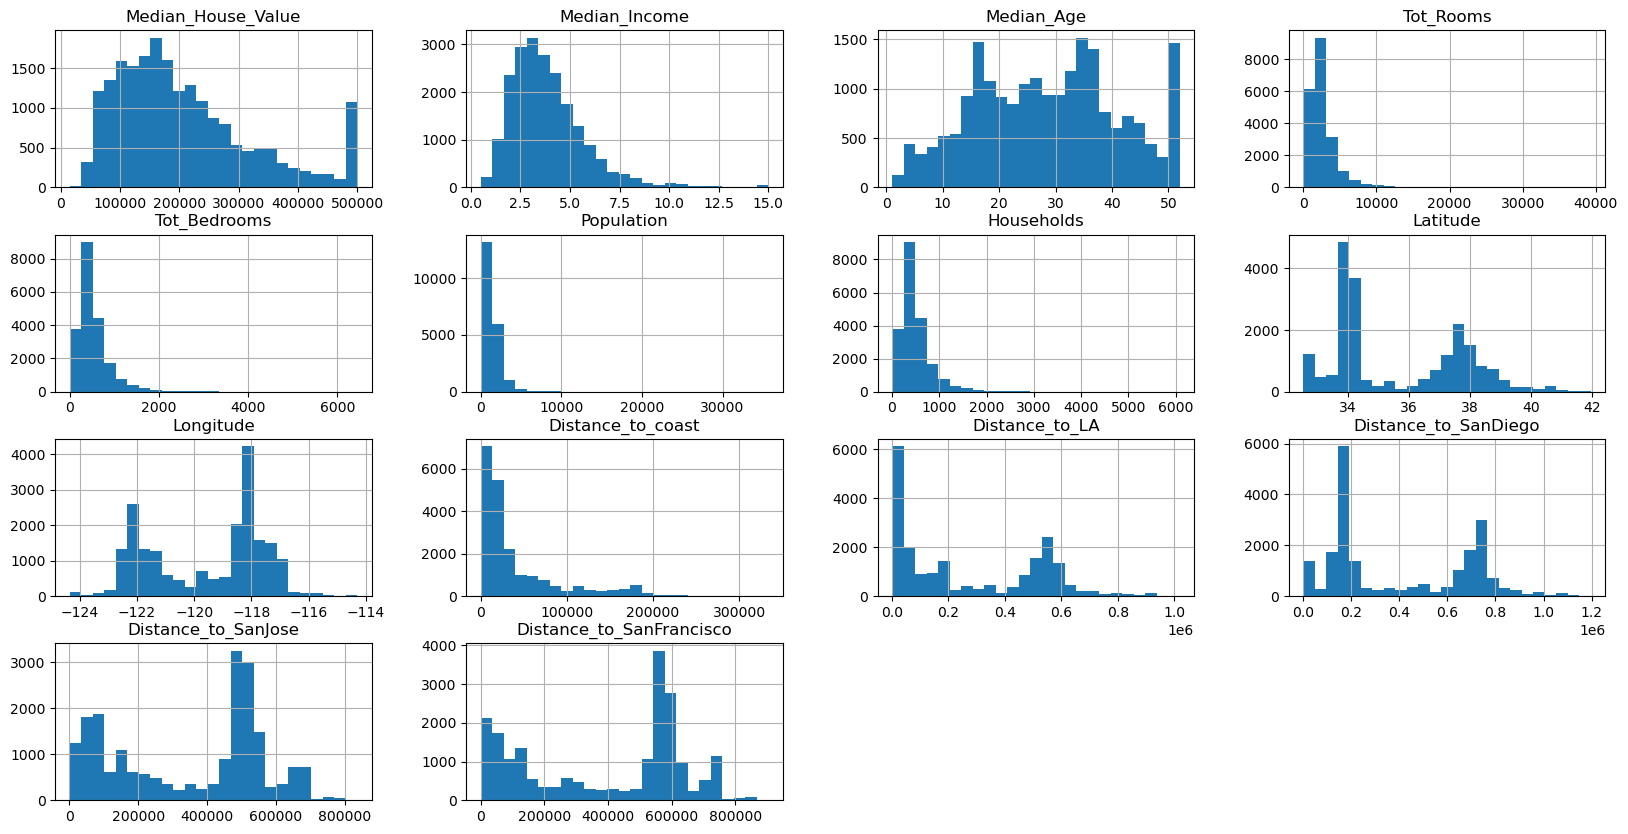

In [21]:
# Generate histograms for all numerical features in the dataset
df_housing.hist(bins=25, figsize=(20, 10))

# Show the plots
plt.show()

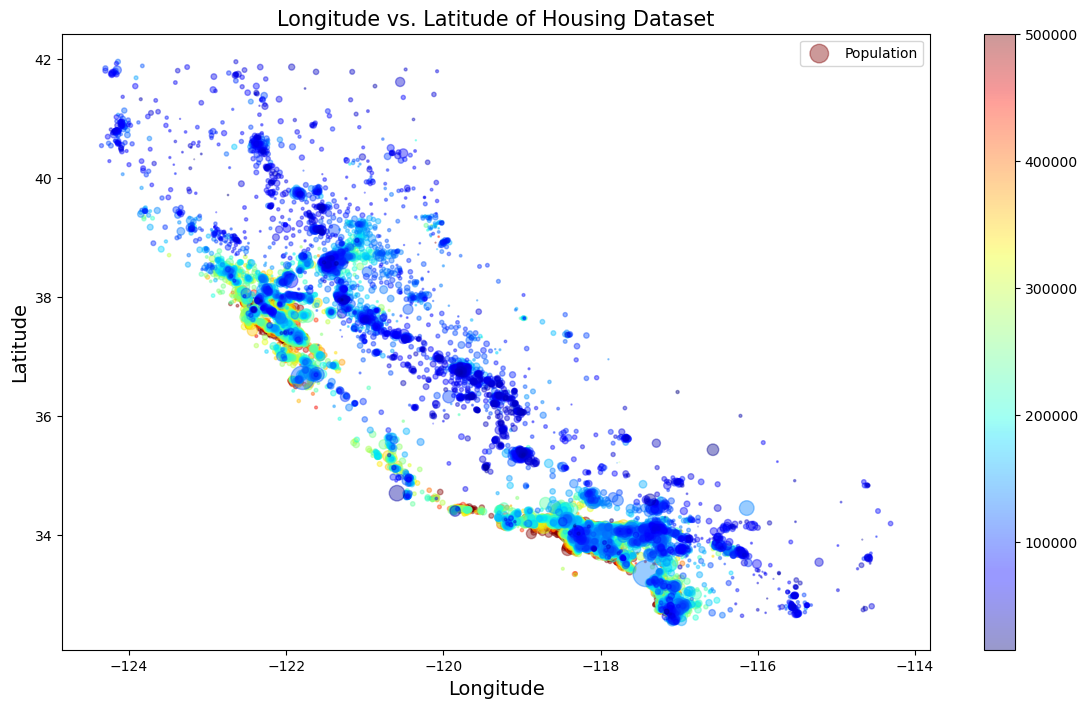

In [22]:
# Set figure size
plt.figure(figsize=(14, 8))  # Change the shape of the figure

# Create a scatter plot with color mapping based on median house value
sc = plt.scatter(
    x=df_housing['Longitude'], 
    y=df_housing['Latitude'], 
    marker='o', 
    c=df_housing['Median_House_Value'], 
    cmap=plt.get_cmap('jet'), 
    alpha=0.4, 
    s=df_housing['Population'] / 100, 
    label='Population'
)

# Add a color bar
plt.colorbar(sc)

# Name the axes
plt.xlabel('Longitude', fontsize=14, color='k')
plt.ylabel('Latitude', fontsize=14, color='k')

# Add title to the plot
plt.title(label='Longitude vs. Latitude of Housing Dataset', fontsize=15, color='k')

# Show the legend
plt.legend()

# Finally, display the graph
plt.show()

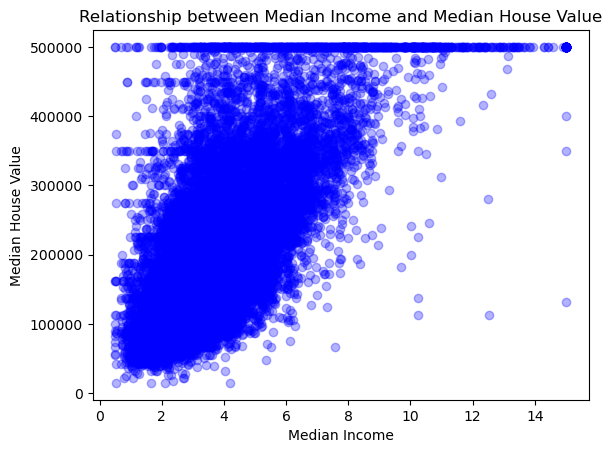

In [25]:
# Create a scatter plot for Median Income vs. Median House Value
plt.scatter(df_housing['Median_Income'], df_housing['Median_House_Value'], alpha=0.3, color='blue')

# Add labels and title
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Relationship between Median Income and Median House Value')

# Show the plot
plt.show()


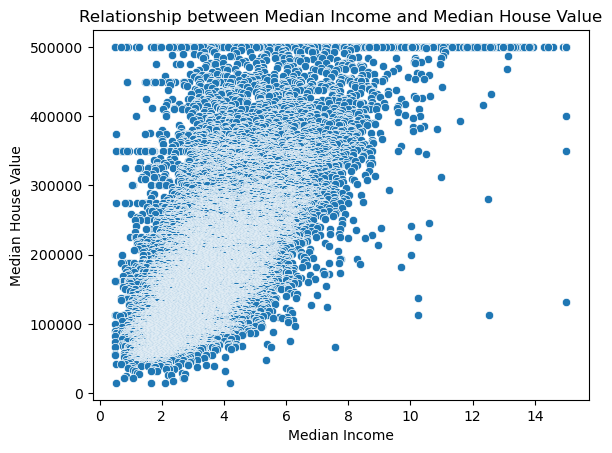

In [26]:
# Create a scatter plot using seaborn
sns.scatterplot(x='Median_Income', y='Median_House_Value', data=df_housing)

# Add labels and title
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.title('Relationship between Median Income and Median House Value')

# Show the plot
plt.show()

In [29]:
 df_housing['Median_Income']

0        1.2434
1        1.1696
2        7.8521
3        9.3959
4        7.8772
          ...  
20635    2.3667
20636    1.6607
20637    2.1000
20638    4.1932
20639    0.5360
Name: Median_Income, Length: 20640, dtype: float64

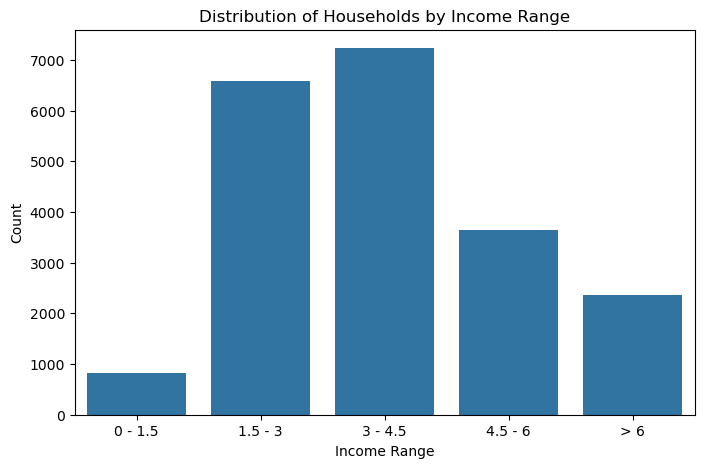

In [31]:
# Create income bins
income_bins = pd.cut(
    x=df_housing['Median_Income'], 
    bins=[0, 1.5, 3, 4.5, 6, np.inf], 
    labels=['0 - 1.5', '1.5 - 3', '3 - 4.5', '4.5 - 6', '> 6']
)

# Create a count plot for income bins
plt.figure(figsize=(8, 5))
sns.countplot(x=income_bins, data=df_housing, order=income_bins.cat.categories)

# Add labels and title
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Distribution of Households by Income Range')

# Show the plot
plt.show()

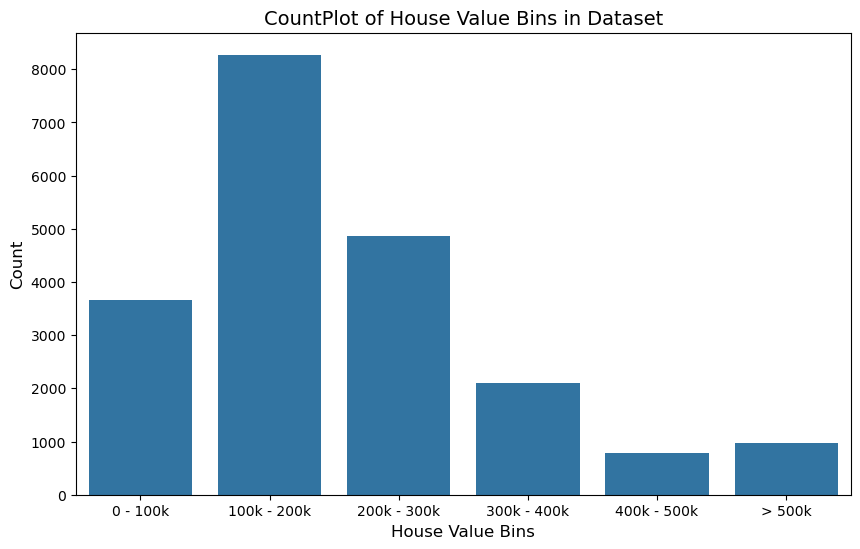

In [33]:
# Create bins for house values
house_value_bins = pd.cut(
    x=df_housing['Median_House_Value'],
    bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
    labels=['0 - 100k', '100k - 200k', '200k - 300k', '300k - 400k', '400k - 500k', '> 500k']
)

# Plot count of house value bins
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins, order=house_value_bins.cat.categories)

# Add labels and title
plt.xlabel('House Value Bins', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, color='k')

# Show the plot
plt.show()

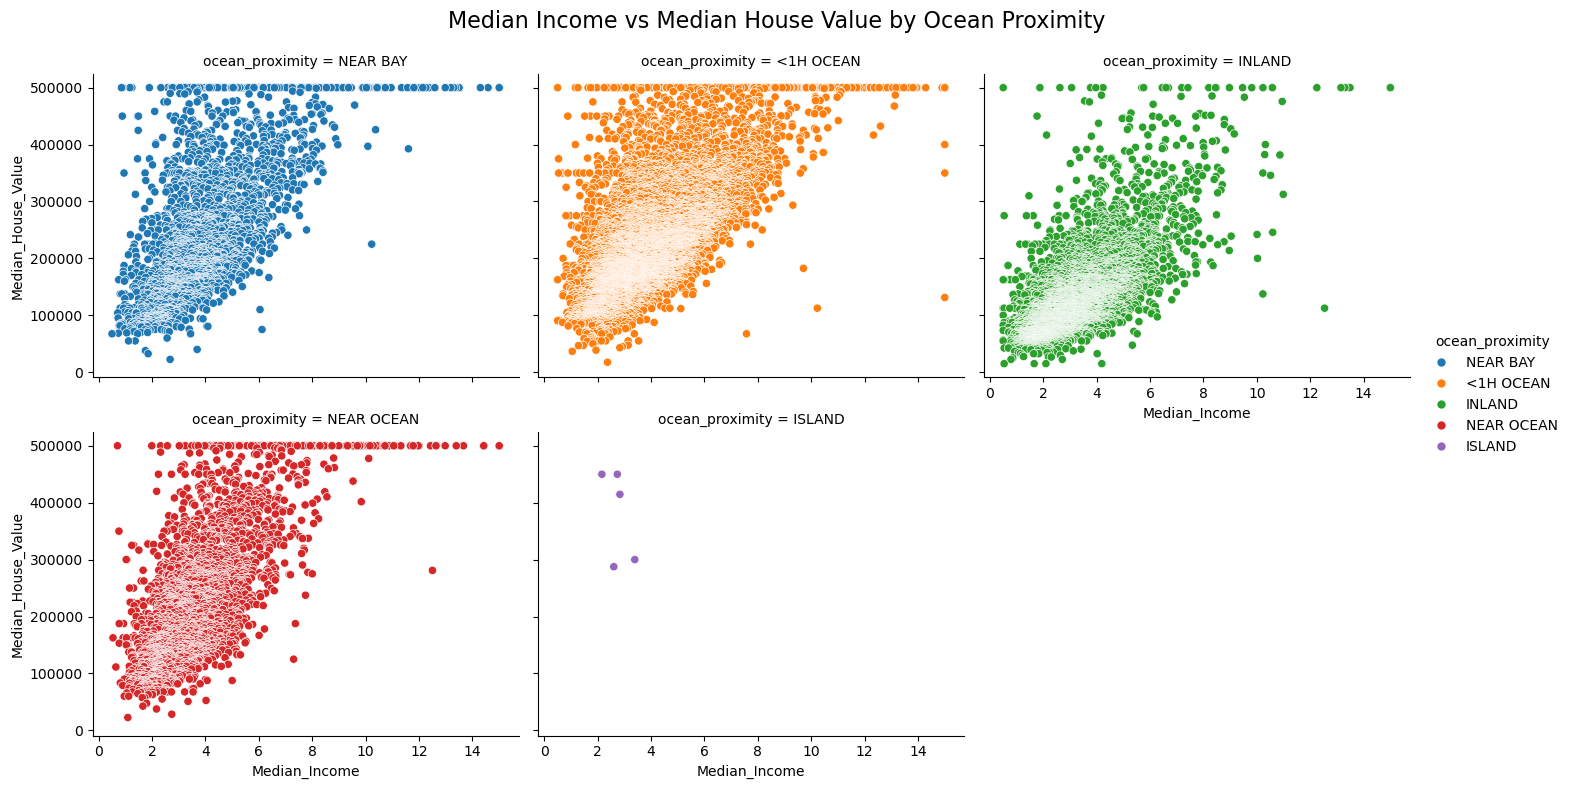

In [35]:
# Create a relational plot
sns.relplot(
    x='Median_Income', 
    y='Median_House_Value', 
    data=df_housing, 
    col='ocean_proximity', 
    hue='ocean_proximity',  # Color coding by category
    col_wrap=3, 
    aspect=1.2,  # Adjust subplot size
    height=4  # Set subplot height
)

# Add overall title
plt.subplots_adjust(top=0.9)
plt.suptitle('Median Income vs Median House Value by Ocean Proximity', fontsize=16, color='k')

plt.show()

In [36]:
# Select numeric columns from the dataset
numericals = df_housing.select_dtypes(include=[np.number])  # Selects all numerical columns

# Calculate quartiles and IQR
Q1 = numericals.quantile(0.25)  # First quartile (25th percentile)
Median_Q2 = numericals.quantile(0.5)  # Second quartile (Median, 50th percentile)
Q3 = numericals.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range (IQR)

# Print results
print(f'The first quartile (Q1) is:\n{Q1}\n')
print(f'The second quartile (Q2 - Median) is:\n{Median_Q2}\n')
print(f'The third quartile (Q3) is:\n{Q3}\n')
print(f'The interquartile range (IQR) is:\n{IQR}\n')

The first quartile (Q1) is:
Median_House_Value          119600.000000
Median_Income                    2.563400
Median_Age                      18.000000
Tot_Rooms                     1447.750000
Tot_Bedrooms                   295.000000
Population                     787.000000
Households                     280.000000
Latitude                        33.930000
Longitude                     -121.800000
Distance_to_coast             9079.756762
Distance_to_LA               32111.253910
Distance_to_SanDiego        159426.394625
Distance_to_SanJose         113119.928650
Distance_to_SanFrancisco    117395.477500
Name: 0.25, dtype: float64

The second quartile (Q2 - Median) is:
Median_House_Value          179700.00000
Median_Income                    3.53480
Median_Age                      29.00000
Tot_Rooms                     2127.00000
Tot_Bedrooms                   435.00000
Population                    1166.00000
Households                     409.00000
Latitude                       

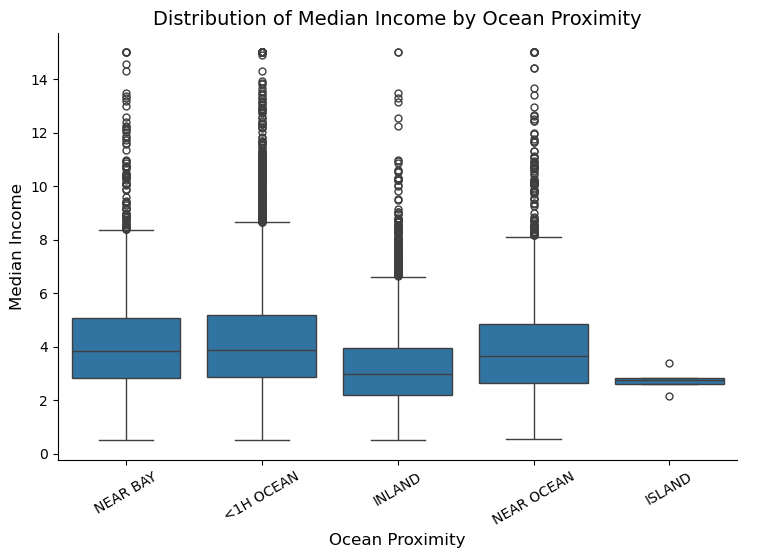

In [37]:
# Create a box plot for Median Income by Ocean Proximity
sns.catplot(
    x='ocean_proximity', 
    y='Median_Income', 
    data=df_housing, 
    kind='box', 
    aspect=1.5,  # Adjust width for better readability
    height=5  # Set height of the plot
)

# Improve labels and title
plt.xlabel('Ocean Proximity', fontsize=12)
plt.ylabel('Median Income', fontsize=12)
plt.title('Distribution of Median Income by Ocean Proximity', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=30)

plt.show()

### Check Correlation

In [39]:
df_housing_numeric = df_housing.select_dtypes(include=['number'])  # Keep only numeric columns
correlation_values = df_housing_numeric.corr()['Median_House_Value'].sort_values(ascending=False)
correlation_values

Median_House_Value          1.000000
Median_Income               0.688075
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
Population                 -0.024650
Distance_to_SanFrancisco   -0.030559
Distance_to_SanJose        -0.041590
Longitude                  -0.045967
Distance_to_SanDiego       -0.092510
Distance_to_LA             -0.130678
Latitude                   -0.144160
Distance_to_coast          -0.469350
Name: Median_House_Value, dtype: float64

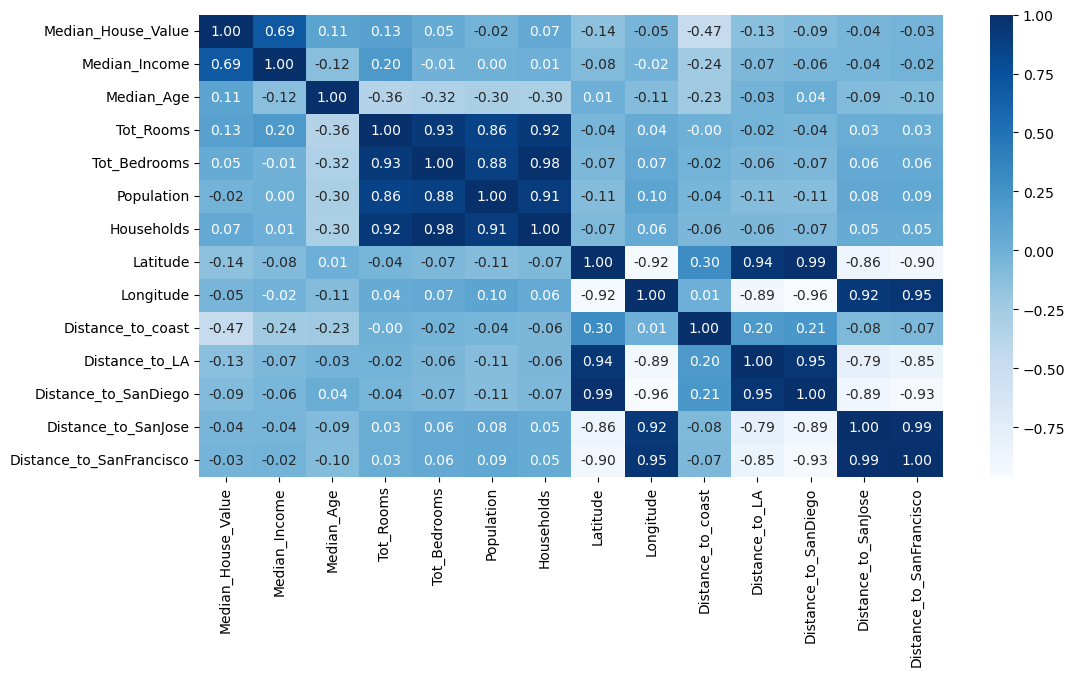

In [40]:
# Set figure size for better readability
plt.figure(figsize=(12, 6))

# Generate a heatmap with the numeric dataframe
sns.heatmap(df_housing_numeric.corr(), annot=True, cbar=True, cmap='Blues', fmt='.2f')

# Display the plot
plt.show()

### Feature Engineering

In [42]:
# Create a new feature: average number of rooms per household
df_housing['rooms_per_household'] = df_housing['Tot_Rooms'] / df_housing['Households']

# Create a new feature: proportion of bedrooms to total rooms
df_housing['bedrooms_per_rooms'] = df_housing['Tot_Bedrooms'] / df_housing['Tot_Rooms']

# Create a new feature: average number of people per household
df_housing['population_per_household'] = df_housing['Population'] / df_housing['Households']  # Fixed variable name typo

In [43]:
# Select only numeric columns
df_housing_numeric = df_housing.select_dtypes(include=['number'])

# Compute correlations for numeric features
correlation_values = df_housing_numeric.corr()['Median_House_Value'].sort_values(ascending=False)

# Display the results
correlation_values

Median_House_Value          1.000000
Median_Income               0.688075
rooms_per_household         0.151948
Tot_Rooms                   0.134153
Median_Age                  0.105623
Households                  0.065843
Tot_Bedrooms                0.050594
population_per_household   -0.023737
Population                 -0.024650
Distance_to_SanFrancisco   -0.030559
Distance_to_SanJose        -0.041590
Longitude                  -0.045967
Distance_to_SanDiego       -0.092510
Distance_to_LA             -0.130678
Latitude                   -0.144160
bedrooms_per_rooms         -0.255624
Distance_to_coast          -0.469350
Name: Median_House_Value, dtype: float64

## Split The DataSet

In [45]:
# Define the feature matrix (X) by dropping the target variable 'Median_House_Value'
X = df_housing.drop(columns='Median_House_Value', axis=1)

# Define the target variable (y) as 'Median_House_Value'
y = df_housing['Median_House_Value'] ## Target

In [46]:
# Split the dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, 
                                                              shuffle=True, random_state=123)

# Split to taining and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size = 0.15, shuffle=True, random_state=152)


# Print the shapes of the training and test datasets
print('X_train_full shape -->', X_train_full.shape)  # Feature matrix for training
print('y_train_fill shape -->', y_train_full.shape)  # Target variable for training
print('X_validation shape --> ', X_valid.shape)
print('y_validation shape --> ', y_valid.shape)
print('X_test shape -->', X_test.shape)  # Feature matrix for testing
print('y_test shape -->', y_test.shape)  # Target variable for testing

X_train_full shape --> (17544, 18)
y_train_fill shape --> (17544,)
X_validation shape -->  (2632, 18)
y_validation shape -->  (2632,)
X_test shape --> (3096, 18)
y_test shape --> (3096,)


### Feature processing

In [48]:
# Select numerical columns (float or int types)
numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ['float64', 'float32', 'int64', 'int32']]

# Select categorical columns (anything that is NOT float or int)
categorical_columns = [col for col in X_train.columns if X_train[col].dtype not in ['float64', 'float32', 'int64', 'int32']]

In [49]:
numerical_columns

['Median_Income',
 'Median_Age',
 'Tot_Rooms',
 'Tot_Bedrooms',
 'Population',
 'Households',
 'Latitude',
 'Longitude',
 'Distance_to_coast',
 'Distance_to_LA',
 'Distance_to_SanDiego',
 'Distance_to_SanJose',
 'Distance_to_SanFrancisco',
 'rooms_per_household',
 'bedrooms_per_rooms',
 'population_per_household']

In [50]:
categorical_columns

['ocean_proximity', 'City']

In [51]:
# Initialize SimpleImputer with 'median' strategy to fill missing values
imputer = SimpleImputer(strategy='median')  
# This will replace missing values in numerical columns with the median of each column.

# Fit the imputer on the training dataset (calculates the median for each numerical column)
imputer.fit(X_train[numerical_columns])  
# This step learns the median values from X_train, which will be used to fill missing values in all datasets.

# Transform the training dataset by replacing missing values with the calculated median
X_train_filled = imputer.transform(X_train[numerical_columns])  
# The missing values in numerical columns of X_train are replaced with their respective medians.

# Transform the validation dataset using the same median values learned from X_train
X_valid_filled = imputer.transform(X_valid[numerical_columns])  
# Ensures consistent imputation across datasets without recalculating the median.

# Transform the test dataset using the same median values learned from X_train
X_test_filled = imputer.transform(X_test[numerical_columns])  
# Ensures that the test dataset is processed using the same learned medians for consistency.

In [52]:
# Initialize StandardScaler to normalize numerical features
scaler = StandardScaler()  
# This scales the features to have zero mean and unit variance, improving model performance.

# Fit the scaler on the training dataset (learns the mean and standard deviation)
scaler.fit(X_train_filled)  
# This ensures the scaling parameters are computed **only from the training data** to avoid data leakage.

# Transform the training dataset using the learned parameters
X_train_scaler = scaler.transform(X_train_filled)  
# Applies standardization to X_train using the **mean and std** from the training data.

# Transform the validation dataset using the same scaling parameters
X_valid_scaler = scaler.transform(X_valid_filled)  
# Ensures consistency by using the **same transformation** as the training data.

# Transform the test dataset using the same scaling parameters
X_test_scaler = scaler.transform(X_test_filled)
# Ensures that the test data is processed consistently without recalculating scaling parameters.

In [53]:
# Create a data preprocessing pipeline for numerical features
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Step 1: Replace missing values with the median of each column
    ('scaler', StandardScaler())  # Step 2: Standardize numerical features (zero mean, unit variance)
])

# Fit the pipeline on the training data (numerical columns only)
num_pipeline.fit(X_train[numerical_columns])  
# This ensures that the imputer calculates the median and the scaler learns the mean & standard deviation from X_train.

# Transform the datasets using the fitted pipeline
X_train_pipeline = num_pipeline.transform(X_train[numerical_columns])  # Apply transformation to training data
X_valid_pipeline = num_pipeline.transform(X_valid[numerical_columns])  # Apply transformation to validation data
X_test_pipeline = num_pipeline.transform(X_test[numerical_columns])  # Apply transformation to test data

# The result: Now, all numerical features are preprocessed (missing values handled + standardized)

### Categorical Feature

---> Encoding --> * Label Encoding + One Hot Encoding + Ordinal Encoding

In [58]:
X_train[categorical_columns].values

array([['NEAR BAY', 'Alameda'],
       ['<1H OCEAN', 'Orange'],
       ['<1H OCEAN', 'Los Angeles'],
       ...,
       ['<1H OCEAN', 'Alameda'],
       ['INLAND', 'Placer'],
       ['NEAR OCEAN', 'San Diego']], dtype=object)

In [59]:
X_train[categorical_columns].values[:, 0]

array(['NEAR BAY', '<1H OCEAN', '<1H OCEAN', ..., '<1H OCEAN', 'INLAND',
       'NEAR OCEAN'], dtype=object)

In [60]:
# Create a pipeline for categorical data preprocessing
Categ_Pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values by filling with 'missing'
    ('ohe', OneHotEncoder(sparse_output=False))  # Convert categorical values into one-hot encoded format
])

# Fit the pipeline on the training data (categorical columns only)
Categ_Pipeline.fit(X_train[categorical_columns])

# Transform categorical features in train, validation, and test sets
X_train_categ = Categ_Pipeline.transform(X_train[categorical_columns])  
X_valid_categ = Categ_Pipeline.transform(X_valid[categorical_columns])  
X_test_categ = Categ_Pipeline.transform(X_test[categorical_columns])  

In [62]:
X_train_categ

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Get All Together

In [65]:
# Define the numerical pipeline
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())  # Standardize numerical features
])

# Define the categorical pipeline
Categ_Pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing categorical values
    ('ohe', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Combine both pipelines using ColumnTransformer
total_pipeline = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, numerical_columns),  # Apply num_pipeline to numerical columns
    ('Categ_Pipeline', Categ_Pipeline, categorical_columns)  # Apply Categ_Pipeline to categorical columns
])

# Fit the pipeline on training data
total_pipeline.fit(X_train)

# Transform train, validation, and test sets
X_train_final = total_pipeline.transform(X_train)
X_valid_final = total_pipeline.transform(X_valid)
X_test_final = total_pipeline.transform(X_test)

### Building ML Model

#### 1. Linear Regression

In [68]:
## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train) # Training

LinearRegression()

In [69]:
## Prediction
y_pred_train_lin = lin_reg.predict(X_train_final)
y_pred_valid_lin = lin_reg.predict(X_valid_final)

root_MSE_train_lin = (mean_squared_error(y_train, y_pred_train_lin)) ** 0.5
root_MSE_valid_lin = (mean_squared_error(y_valid, y_pred_valid_lin)) ** 0.5

print('RMSE for training using linear regression --> ', root_MSE_train_lin)
print('RMSE for validation using linear regression --> ', root_MSE_valid_lin) ## good

RMSE for training using linear regression -->  63197.827803393186
RMSE for validation using linear regression -->  61454.867953501715


## 2. SGDRegressor --> Stochastic Gradient Descent

In [76]:
sgd_reg = SGDRegressor(penalty = None,  max_iter=1000, shuffle=True, eta0=0.003)

sgd_reg.fit(X_train_final, y_train)

SGDRegressor(eta0=0.003, penalty=None)

In [81]:
## Prediction
y_pred_train_sgd = sgd_reg.predict(X_train_final)
y_pred_valid_sgd = sgd_reg.predict(X_valid_final)

root_MSE_train_sgd = (mean_squared_error(y_train, y_pred_train_sgd)) ** 0.5
root_MSE_valid_sgd = (mean_squared_error(y_valid, y_pred_valid_sgd)) ** 0.5

print('RMSE for training using linear regression --> ', root_MSE_train_sgd)
print(f'RMSE for validation using linear regression --> {root_MSE_valid_sgd}') ## good

RMSE for training using linear regression -->  64213.37600163334
RMSE for validation using linear regression --> 62362.29747897729
